# Working with scikit learn wine dataset

### importing required modules

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### load the dataset from scikit learn

In [2]:
wine_dataset = load_wine(as_frame=True)

## Examine the data
### Feature section

In [3]:
df = wine_dataset.data

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
# shape of wine data: 178 rows by 13 columns
df.shape

(178, 13)

### Target section

In [6]:
target = wine_dataset.target

In [7]:
# sets of values in target
target.unique()

array([0, 1, 2])

In [8]:
# Labels of the target
wine_dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### Combined view of the structure of the dataset
target being visible with selected features

In [9]:
wine_dataset.frame[['alcohol', 'ash', 'hue', 'target']]

,alcohol,ash,hue,target
0,14.23,2.43,1.04,0
1,13.20,2.14,1.05,0
2,13.16,2.67,1.03,0
3,14.37,2.50,0.86,0
4,13.24,2.87,1.04,0
...,...,...,...,...
173,13.71,2.45,0.64,2
174,13.40,2.48,0.70,2
175,13.27,2.26,0.59,2
176,13.17,2.37,0.60,2


### Understanding the data
The features of the wine dataset is 13 (because of the 13 columns) and the target is made up of three classifications
class0, class1 and class2 with values 0, 1 and 2 respectively.

## Modelling the data

In [10]:
X = df
y = target

### Split the data into train and test dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape

((142, 13), (36, 13))

### Train the data
1. Choose a model
2. Train with the chosen model

In [13]:
# the model
knn = KNeighborsClassifier(n_neighbors=3)

In [14]:
# train
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
# predict
y_pred = knn.predict(X_test)

In [16]:
y_pred

array([2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0])

### Check for accuracy
Accuracy of 81% means that about 8 right predictions out of 10.

In [17]:
accuracy = accuracy_score(y_test, y_pred)
f'{accuracy:.2f}'

'0.81'

#### The can look into the prediction, to understand what is failing visually 

In [19]:
# Create the confusion matrix data
cm = confusion_matrix(y_test, y_pred)

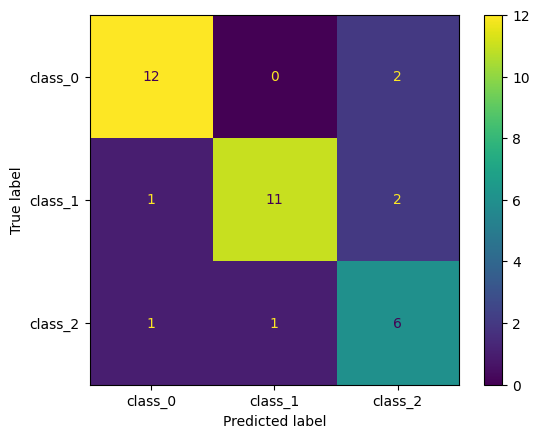

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine_dataset.target_names)
disp.plot()